### kütüphaneleri aktarma

In [1]:
#import libraries
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.axes_style('whitegrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


### veriyi okuma

In [2]:
#read data
from scipy.io import loadmat

def read_HSI():
    data = loadmat('PaviaU.mat')
    X = data['paviaU']

    data_gt = loadmat('PaviaU_gt.mat')
    y = data_gt['paviaU_gt']

    print(f"X shape: {X.shape}\ny shape: {y.shape}")
    return X, y

X, y = read_HSI()

X shape: (610, 340, 103)
y shape: (610, 340)


### veriyi csv formatına çevirme

In [3]:
#convert data to csv df.iloc[:, :-1].describe()
import pandas as pd
import numpy as np

def extract_pixels(X,y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis = 1)
  df.columns = [f'bans{i}' for i in range(1, 1+X.shape[2])] + ['class']
  df.to_csv('Dataset.csv')
  return df

df = extract_pixels(X,y)

In [4]:
df.head()

,bans1,bans2,bans3,bans4,bans5,bans6,bans7,bans8,bans9,bans10,...,bans95,bans96,bans97,bans98,bans99,bans100,bans101,bans102,bans103,class
0,647,499,464,371,291,319,365,322,296,305,...,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,...,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,...,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,...,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,...,2392,2344,2289,2328,2415,2424,2386,2431,2456,0


In [5]:
df.iloc[:, :-1].describe()

,bans1,bans2,bans3,bans4,bans5,bans6,bans7,bans8,bans9,bans10,...,bans94,bans95,bans96,bans97,bans98,bans99,bans100,bans101,bans102,bans103
count,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,...,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000
mean,925.324995,850.237584,800.363558,809.889783,830.085950,834.162700,833.530641,825.932729,823.827637,830.388689,...,2262.503269,2266.693293,2257.763443,2249.329595,2246.216779,2238.254364,2231.822647,2224.744884,2236.901707,2253.451692
std,444.427499,468.464292,493.590158,527.235307,555.419089,574.543548,592.474167,605.782075,619.492506,636.532214,...,863.285910,863.351557,857.286520,845.571285,833.001117,826.922155,827.403828,827.257369,834.092348,844.165146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,145.000000,146.000000,150.000000,140.000000,0.000000,134.000000,0.000000
25%,649.000000,555.000000,483.000000,473.000000,480.000000,474.000000,461.000000,444.000000,433.000000,430.000000,...,1696.000000,1699.000000,1693.000000,1690.000000,1696.000000,1692.000000,1685.000000,1675.000000,1682.000000,1692.000000
50%,857.000000,762.000000,694.000000,690.000000,693.000000,681.000000,671.000000,661.000000,657.000000,658.000000,...,2246.000000,2252.000000,2244.000000,2236.000000,2238.000000,2235.000000,2231.000000,2226.000000,2244.000000,2261.000000
75%,1111.000000,1046.000000,1015.000000,1036.000000,1058.000000,1066.000000,1068.000000,1064.000000,1066.000000,1080.000000,...,2724.000000,2730.000000,2721.000000,2711.000000,2701.000000,2688.000000,2683.000000,2677.000000,2692.000000,2715.000000
max,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000


### TEMEL BİLEŞEN ANALİZİ Principal component analysis (PCA)

Text(0, 0.5, 'Kümülatif açıklanan varyans')

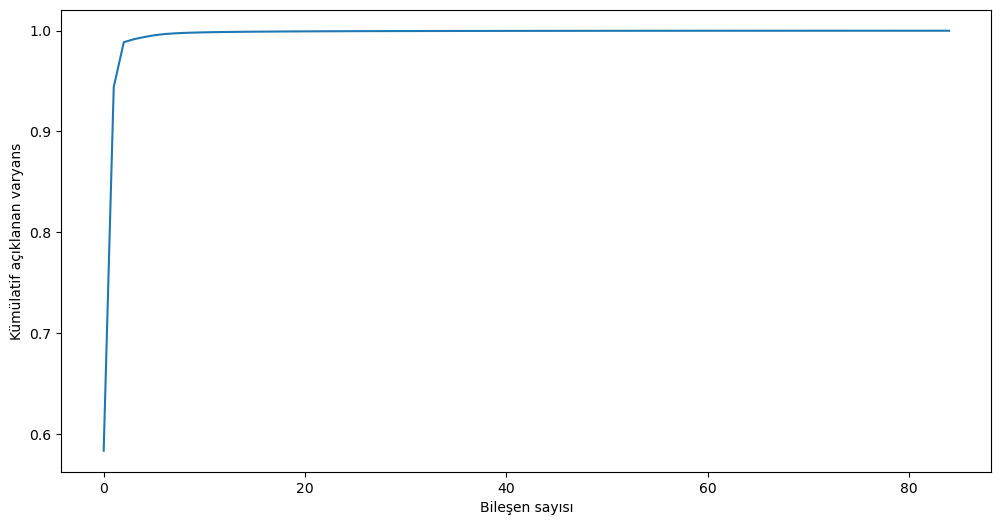

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 85)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

ev = pca.explained_variance_ratio_

plt.figure(figsize = (12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Bileşen sayısı')
plt.ylabel('Kümülatif açıklanan varyans')



In [7]:
pca = PCA(n_components = 8)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,9)] + ['class']

In [8]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,class
0,-5150.190044,6795.052770,1532.351461,410.030134,-259.856157,-832.898970,293.239776,278.385218,0
1,-6082.245760,3158.592195,1463.194744,154.617093,-438.871878,-496.202149,362.925839,187.355434,0
2,-7214.505405,1158.875812,1400.817899,410.044063,38.052916,-560.804196,-140.004203,8.847606,0
3,-6566.279360,3398.894763,1126.024772,496.775042,-302.415250,-409.493899,218.391586,-2.957278,0
4,-6496.967970,2154.797771,1035.954575,27.247705,-194.891403,-189.044607,-71.142484,-97.987809,0


### PCA uygulamasından sonra bileşenlerin görselleştirilmesi

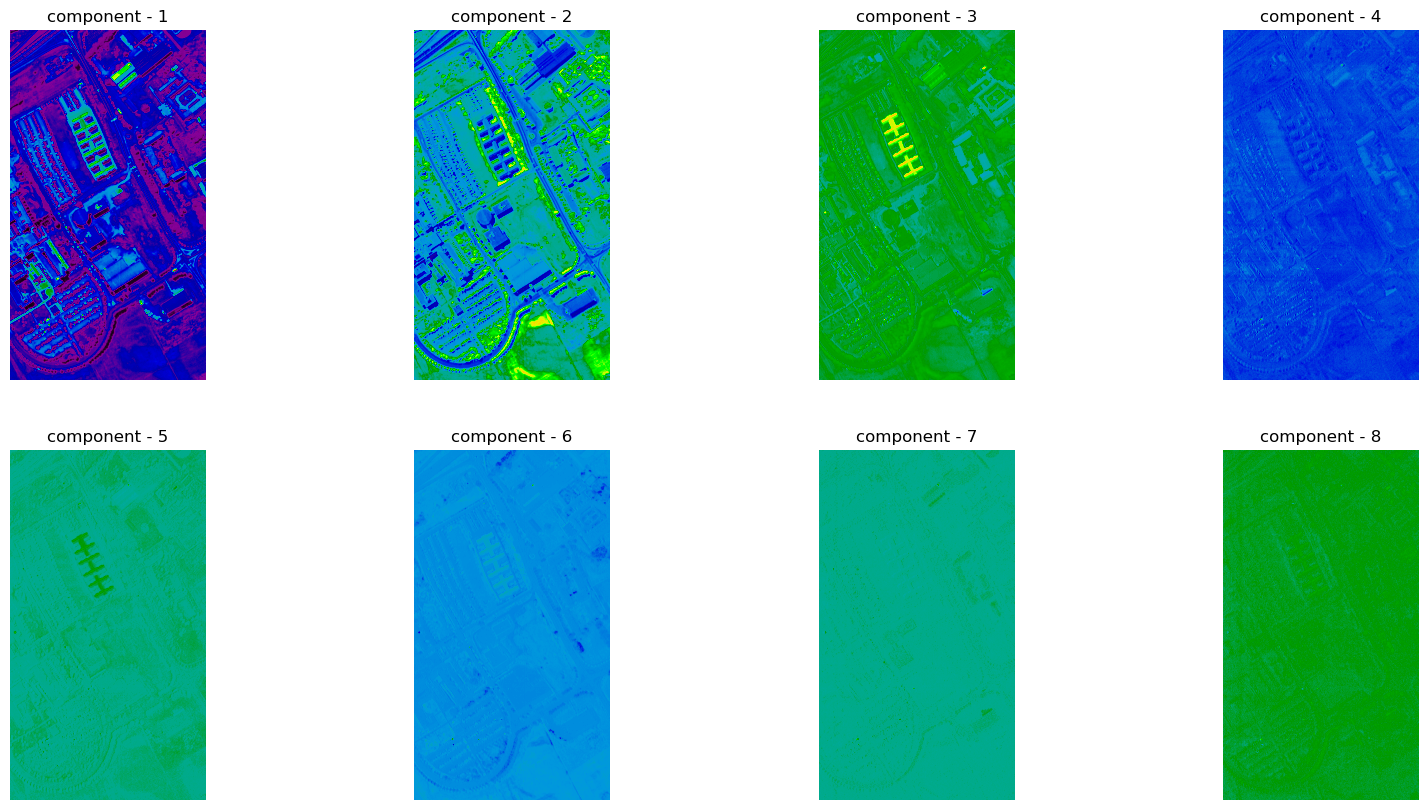

In [9]:

fig = plt.figure(figsize = (20,10))

for i in range(1, 1+8):
  fig.add_subplot(2,4, i)
  plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(610,340), cmap = 'nipy_spectral') #grayden spectrale geçildi
  plt.axis('off')
  plt.title(f'component - {i}') #bant tabiri yerine bileşen yazıldı

plt.savefig('IP_PCA_Bands.png')

In [10]:
q.to_csv('IP_40_PCA.csv', index = False)

### DESTEK VEKTÖR MAKİNESİ Support Vector Machine (SVM)

In [11]:
#svm
x = q[q['class'] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, 'class'].values

names = ['Asphalt', 'Meadows', 'Gravel', 'Trees', 'Painted metal sheets', 'Bare Soil', 'Bitumen',
         'Self-Blocking Bricks', 'Shadows']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.10, random_state = 42)


svm = SVC(C = 150,kernel='rbf', cache_size = 10*1024)

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)

print(f'Accuracy: %{100*accuracy_score(y_test, ypred)}')

Accuracy: %89.42310189875062


### KARIŞIKLIK MATRİSİ (Confusion Matrix)
Makine öğrenimi alanında ve özellikle istatistiksel sınıflandırma probleminde , hata matrisi olarak da bilinen bir karışıklık matrisi , bir algoritmanın, tipik olarak denetimli öğrenme algoritmasının performansının görselleştirilmesine olanak tanıyan özel bir tablo düzenidir . Denetimsiz öğrenmede buna genellikle eşleştirme matrisi denir .

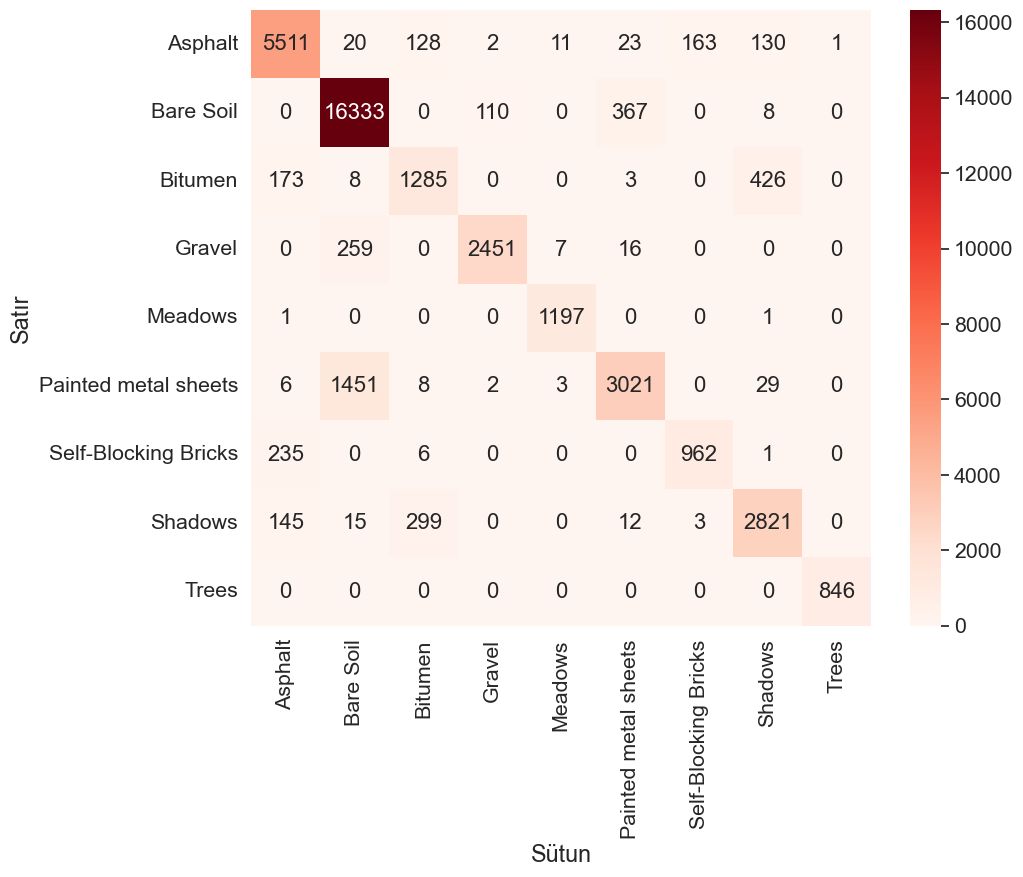

In [12]:
import seaborn as sn
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns = np.unique(names), index = np.unique(names))
df_cm.index.name = 'Satır'
df_cm.columns.name = 'Sütun'
plt.figure(figsize = (10, 8))
sn.set(font_scale = 1.4) #for label size
sn.heatmap(df_cm, cmap = "Reds", annot = True, annot_kws = {"size" : 16}, fmt = 'd')
plt.savefig('cmap.png', dpi = 300)

In [13]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, ypred)

0.8576149423973259

![](cohens_kappa_tablo.png)

### SINIFLANDIRMA RAPORU

In [14]:
print(classification_report(y_test, ypred, target_names = names))

                      precision    recall  f1-score   support

             Asphalt       0.91      0.92      0.91      5989
             Meadows       0.90      0.97      0.94     16818
              Gravel       0.74      0.68      0.71      1895
               Trees       0.96      0.90      0.93      2733
Painted metal sheets       0.98      1.00      0.99      1199
           Bare Soil       0.88      0.67      0.76      4520
             Bitumen       0.85      0.80      0.83      1204
Self-Blocking Bricks       0.83      0.86      0.84      3295
             Shadows       1.00      1.00      1.00       846

            accuracy                           0.89     38499
           macro avg       0.89      0.87      0.88     38499
        weighted avg       0.89      0.89      0.89     38499



Best Sigma Value: 0.1
Best Accuracy: 42.810468602946


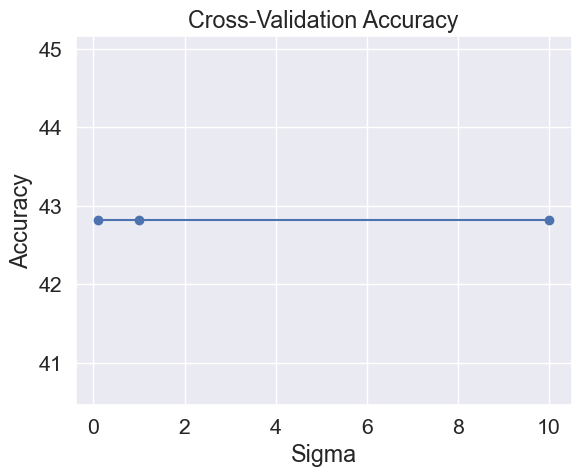

In [15]:
l = []
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))

import numpy as np
from sklearn.model_selection import cross_val_score

# Sigma değerlerini belirleyin
sigma_values = [0.1, 1, 10]  # Örnek olarak sigma değerleri

# Boş bir liste oluşturun
mean_accuracies = []

# Her bir sigma değeri için çapraz doğrulama yapın ve doğruluk skorlarını kaydedin
for sigma in sigma_values:
    classifier = SVC(gamma=1/(2*sigma**2))  # Sigma değerini kullanarak SVC sınıflandırıcısını oluşturun
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
    mean_accuracies.append(accuracies.mean() * 100)

# En iyi sigma değerini bulun
best_sigma = sigma_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

print("Best Sigma Value:", best_sigma)
print("Best Accuracy:", best_accuracy)

# Çizgi grafiği oluşturun
plt.plot(sigma_values, mean_accuracies, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

Accuracy: 80.01 %
Standard Deviation: 0.88 %


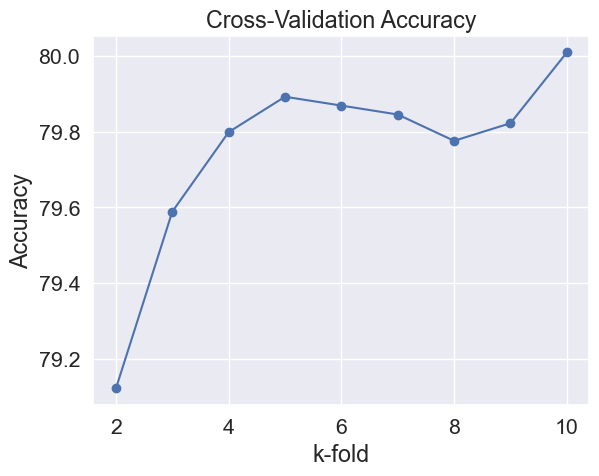

In [16]:
# SVC sınıflandırıcısını oluştururken gamma parametresini kullanarak sigma değerini ayarlayın
classifier = SVC()  # Sigma değerini burada belirleyebilirsiniz

# Çapraz doğrulama ile doğruluk skorunu hesaplayın
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

# Doğruluk skoru ve standart sapmayı yazdırın
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

import matplotlib.pyplot as plt

# K-fold değerlerini belirleyin
k_values = range(2, 11)  # Örnek olarak 2'den 10'a kadar k-fold değerleri

# Boş bir liste oluşturun
mean_accuracies = []

# Her bir k-fold değeri için çapraz doğrulama yapın ve doğruluk skorlarını kaydedin
for k in k_values:
    classifier = SVC(gamma='scale')  # Sigma değerini burada belirleyebilirsiniz
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=k)
    mean_accuracies.append(accuracies.mean() * 100)

# Çizgi grafiği oluşturun
plt.plot(k_values, mean_accuracies, marker='o')
plt.xlabel('k-fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy')
plt.grid(True)
plt.show()


In [17]:
from sklearn.metrics import make_scorer
print(cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10,
                      scoring=make_scorer(cohen_kappa_score),
                      n_jobs=-1).mean())

0.7234360569082221


#### Classification Map

In [18]:
print(df.iloc[:, -1].values.shape)
610*340

(207400,)


207400

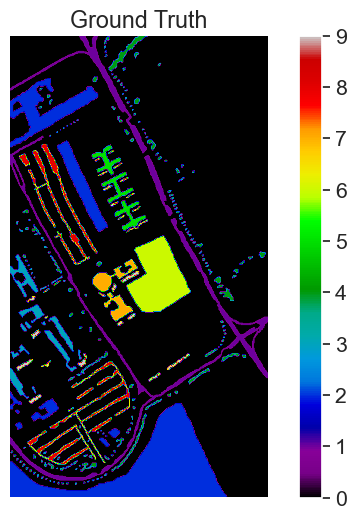

In [19]:
plt.figure(figsize=(8, 6))
plt.imshow(df.iloc[:, -1].values.reshape(610,340) , cmap='nipy_spectral')  # reshape size changed to (610, 340)
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.savefig('ground_truth.png')
plt.show()

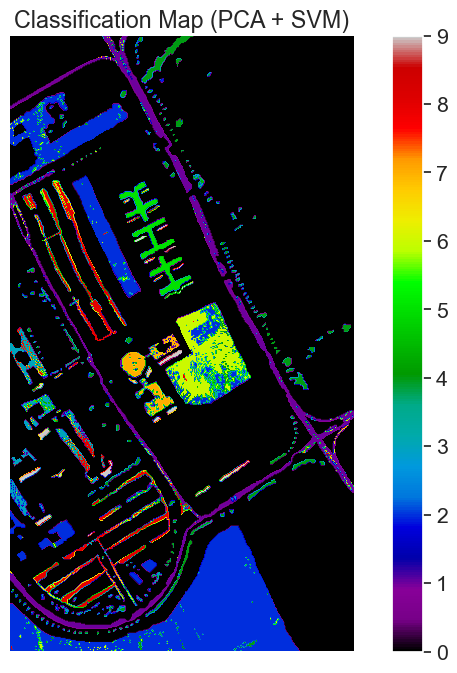

In [20]:
l = []
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1))[0]) # assuming svm.predict returns a list

clmap = np.array(l).reshape(610,340).astype('float') # removed -1 from reshape
plt.figure(figsize = (10, 8))
plt.imshow(clmap, cmap = 'nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.title('Classification Map (PCA + SVM)')
plt.savefig('IP_cmap.png')
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Veri setini eğitim ve test setlerine ayırma
X_train, y_train,  = X, y

# SVM sınıflandırıcısını oluşturma
svm = SVC(C = 150,kernel='rbf', cache_size = 10*1024)

# SVM sınıflandırıcısını eğitme
svm.fit(X_train, y_train)

# Test setindeki örneklerin etiketlerini tahmin etme
ypred = svm.predict(X_test)

# Modelin doğruluğunu hesaplama ve yazdırma
print(f'Accuracy: %{100*accuracy_score(y_test, ypred)}')


l = []
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1))[0]) # assuming svm.predict returns a list


Accuracy: %91.30107275513649


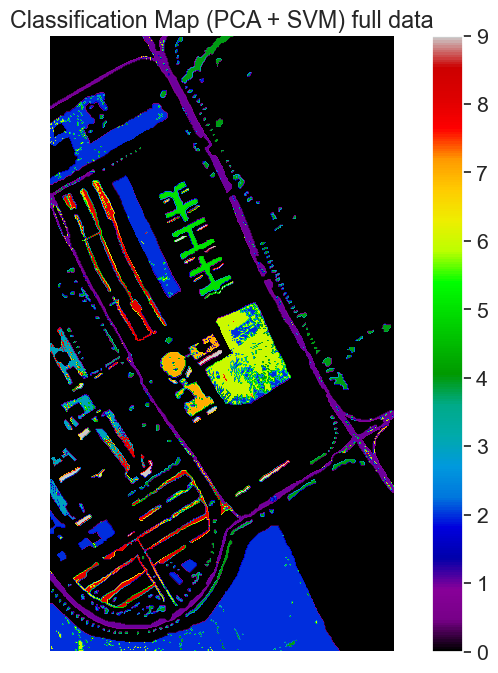

In [22]:
clmap = np.array(l).reshape(610,340).astype('float') # removed -1 from reshape
plt.figure(figsize = (10, 8))
plt.imshow(clmap, cmap = 'nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.title('Classification Map (PCA + SVM) full data')
plt.savefig('IP_cmap.png')
plt.show()